# Credit Scoring 2

**Loading csv files**

In [1]:
dataold <- read.csv("data/DATA_3.01_CREDIT.csv")  # training dataset
datanew <- read.csv("data/DATA_4.01_CREDIT2.csv") # test dataset

In [2]:
head(dataold)

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,514,4,71,11,Male,No,No,Asian,580
4,148.924,681,3,36,11,Female,No,No,Asian,964
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,569,4,77,10,Male,No,No,Caucasian,1151


In [3]:
head(datanew)

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,21.786,355,1,50,17,Male,No,Yes,Caucasian,580
2,31.335,289,3,38,7,Female,No,No,Caucasian,172
3,59.855,365,1,46,13,Female,No,Yes,Caucasian,295
4,44.061,352,1,79,11,Male,No,Yes,African American,414
5,82.706,536,2,64,13,Female,No,Yes,Asian,905
6,24.460,165,2,50,14,Female,No,Yes,Asian,0


**Exploring the "datanew"**

In [4]:
str(datanew)

'data.frame':	100 obs. of  10 variables:
 $ Income   : num  21.8 31.3 59.9 44.1 82.7 ...
 $ Rating   : int  355 289 365 352 536 165 287 298 332 494 ...
 $ Cards    : int  1 3 1 1 2 2 3 3 2 3 ...
 $ Age      : int  50 38 46 79 64 50 80 41 33 34 ...
 $ Education: int  17 7 13 11 13 14 8 14 6 18 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 2 1 2 2 1 2 1 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 3 3 1 2 2 3 2 2 3 ...
 $ Balance  : int  580 172 295 414 905 0 70 0 681 885 ...


In [5]:
summary(datanew)

     Income           Rating          Cards           Age       
 Min.   : 10.73   Min.   :112.0   Min.   :1.00   Min.   :23.00  
 1st Qu.: 21.00   1st Qu.:282.0   1st Qu.:2.00   1st Qu.:44.00  
 Median : 33.27   Median :363.0   Median :3.00   Median :57.50  
 Mean   : 48.71   Mean   :375.4   Mean   :2.75   Mean   :57.72  
 3rd Qu.: 61.80   3rd Qu.:448.0   3rd Qu.:3.00   3rd Qu.:71.00  
 Max.   :182.73   Max.   :982.0   Max.   :9.00   Max.   :98.00  
   Education        Gender   Student  Married             Ethnicity 
 Min.   : 6.00    Male :61   No :92   No :38   African American:21  
 1st Qu.:11.00   Female:39   Yes: 8   Yes:62   Asian           :21  
 Median :14.00                                 Caucasian       :58  
 Mean   :13.62                                                      
 3rd Qu.:16.00                                                      
 Max.   :19.00                                                      
    Balance    
 Min.   :   0  
 1st Qu.: 191  
 Median : 579 

 The income range is from $10,730 to $182,730. The rating range is from 112 to 982, with a 375 average.

### Linear Regression Model

Let's build a linear regression model for the Rating, using the old dataset (i.e., training dataset):

In [7]:
# Estimate a linear Regression Model of Rating (dependent variable) as a function of everything else (independent variables).
linreg <- lm(Rating ~ .,data=dataold) 

# Summary of our Linear Regression Model
summary(linreg) 


Call:
lm(formula = Rating ~ ., data = dataold)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.316 -10.820   4.875  16.588  43.501 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        140.881377   9.666167  14.575   <2e-16 ***
Income               2.094703   0.048118  43.533   <2e-16 ***
Cards               -0.762853   1.079874  -0.706   0.4805    
Age                  0.144603   0.085872   1.684   0.0933 .  
Education            0.179388   0.473743   0.379   0.7052    
GenderFemale         1.770375   2.917842   0.607   0.5445    
StudentYes         -98.804778   4.959789 -19.921   <2e-16 ***
MarriedYes           3.176873   3.005535   1.057   0.2914    
EthnicityAsian      -4.428289   4.006859  -1.105   0.2700    
EthnicityCaucasian  -1.250612   3.533864  -0.354   0.7237    
Balance              0.231363   0.003661  63.189   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.91 

We can improve the model take out the variables with less impact in model (e.g. EthnicityCaucasian), but accurace 97% is good enough for our propose here. We can now test the model with the new dataset (test dataset):

In [8]:
predcreditscore <- predict(linreg, newdata=datanew, type="response") 
head(predcreditscore)

1        2        3        4        5        6 
332.1505 251.2952 346.4296 344.7714 534.0896 200.8526

What the predict function has done is to predict a credit score for everyone of 100 new observations (newdata). 

Let's see now how the model performs on the old dataset by looking at the correlation coefficient between the fitted values and the actual values:

In [9]:
# Computes the correlation between the fitted values and the actual ones
cor(linreg$fitted.values,dataold$Rating)

[1] 0.9867324

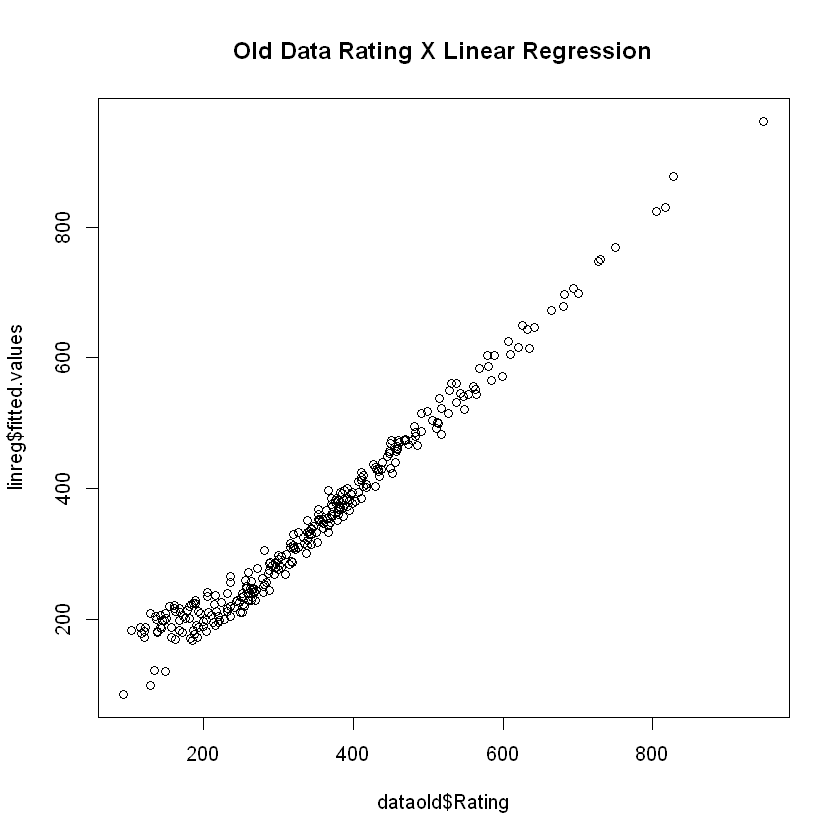

In [11]:
# Plot the fitted values vs. the actual ones
plot(dataold$Rating,linreg$fitted.values, main = "Old Data Rating X Linear Regression")

The correlation coefficient is 0.986. The model fits the data pretty well.

Now, let's see now how the model performs on the new dataset by looking at the correlation coefficient between the predicted values and the actual values:

In [12]:
# Computes the correlation between the fitted values and the actual ones
cor(predcreditscore,datanew$Rating)

[1] 0.988097

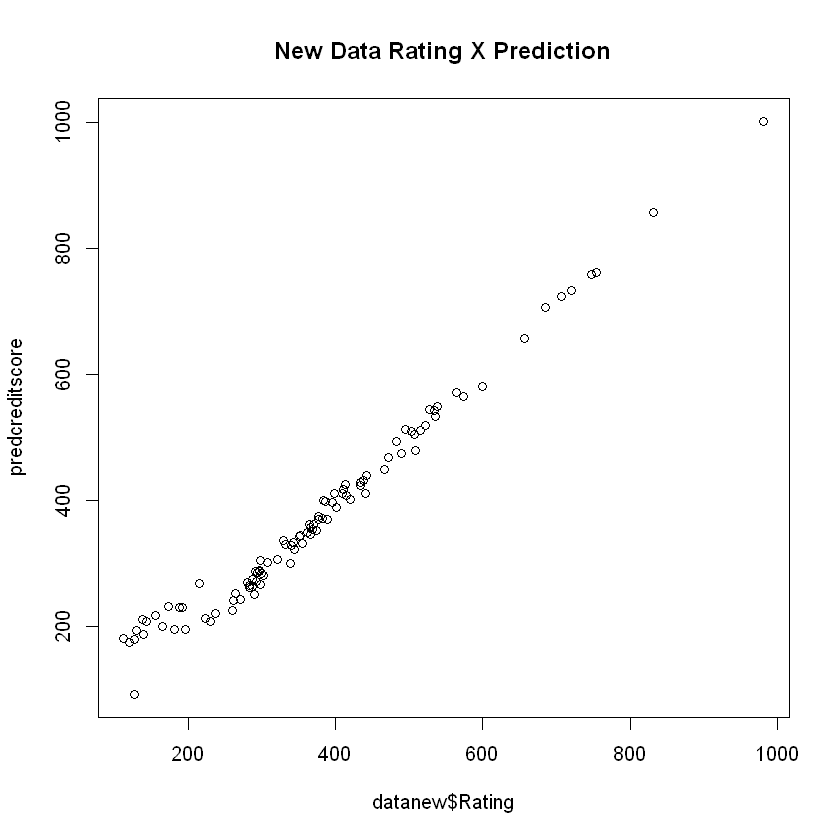

In [14]:
# Plot the fitted values vs. the actual ones
plot(datanew$Rating,predcreditscore, main = "New Data Rating X Prediction")

The correlation coefficient is 0.988. The model does a good job on predicting new values.